In [2]:
import pandas as pd
import numpy as np

In [3]:
from pandas.plotting import scatter_matrix

In [4]:
from scipy import stats

In [5]:
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [6]:
data = pd.read_csv('./data/CSVLog_20210202_134233.csv', header=0)

In [7]:
data2 = pd.read_csv('./data/CSVLog_20210202_151119.csv')

In [8]:
data.head()

,Time,Latitude (deg),Longitude (deg),Vehicle speed (MPH),Battery Block Voltage -V01 (V),Battery Block Voltage -V02 (V),Battery Block Voltage -V03 (V),Battery Block Voltage -V04 (V),Battery Block Voltage -V05 (V),Battery Block Voltage -V06 (V),Battery Block Voltage -V07 (V),Battery Block Voltage -V08 (V),Battery Block Voltage -V09 (V),Battery Block Voltage -V10 (V),Battery Block Voltage -V11 (V),Battery Block Voltage -V12 (V),Battery Block Voltage -V13 (V),Battery Block Voltage -V14 (V),Calculate Load
0,02/02/2021 01:42:33.4212 PM,30.32,-97.69,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,02/02/2021 01:42:34.3672 PM,30.32,-97.69,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,02/02/2021 01:42:35.3170 PM,30.32,-97.69,0.0,15.75,15.76,15.67,15.70,15.71,15.73,15.70,15.71,15.74,15.73,15.66,15.71,15.72,15.76,32.93
3,02/02/2021 01:42:36.2673 PM,30.32,-97.69,0.0,15.71,15.75,15.66,15.69,15.70,15.71,15.65,15.70,15.72,15.69,15.64,15.75,15.71,15.76,32.93
4,02/02/2021 01:42:37.2168 PM,30.32,-97.69,0.0,15.73,15.75,15.66,15.71,15.70,15.70,15.68,15.70,15.72,15.70,15.62,15.72,15.67,15.74,32.93


In [9]:
data.index

RangeIndex(start=0, stop=840, step=1)

In [10]:
data.columns

Index(['Time', ' Latitude (deg)', ' Longitude (deg)', ' Vehicle speed (MPH)',
       ' Battery Block Voltage -V01 (V)', ' Battery Block Voltage -V02 (V)',
       ' Battery Block Voltage -V03 (V)', ' Battery Block Voltage -V04 (V)',
       ' Battery Block Voltage -V05 (V)', ' Battery Block Voltage -V06 (V)',
       ' Battery Block Voltage -V07 (V)', ' Battery Block Voltage -V08 (V)',
       ' Battery Block Voltage -V09 (V)', ' Battery Block Voltage -V10 (V)',
       ' Battery Block Voltage -V11 (V)', ' Battery Block Voltage -V12 (V)',
       ' Battery Block Voltage -V13 (V)', ' Battery Block Voltage -V14 (V)',
       ' Calculate Load'],
      dtype='object')

In [11]:
battery_block = data[[' Battery Block Voltage -V01 (V)', ' Battery Block Voltage -V02 (V)',
       ' Battery Block Voltage -V03 (V)', ' Battery Block Voltage -V04 (V)',
       ' Battery Block Voltage -V05 (V)', ' Battery Block Voltage -V06 (V)',
       ' Battery Block Voltage -V07 (V)', ' Battery Block Voltage -V08 (V)',
       ' Battery Block Voltage -V09 (V)', ' Battery Block Voltage -V10 (V)',
       ' Battery Block Voltage -V11 (V)', ' Battery Block Voltage -V12 (V)',
       ' Battery Block Voltage -V13 (V)', ' Battery Block Voltage -V14 (V)']]

In [12]:
#pd.plotting.scatter_matrix(battery_block)

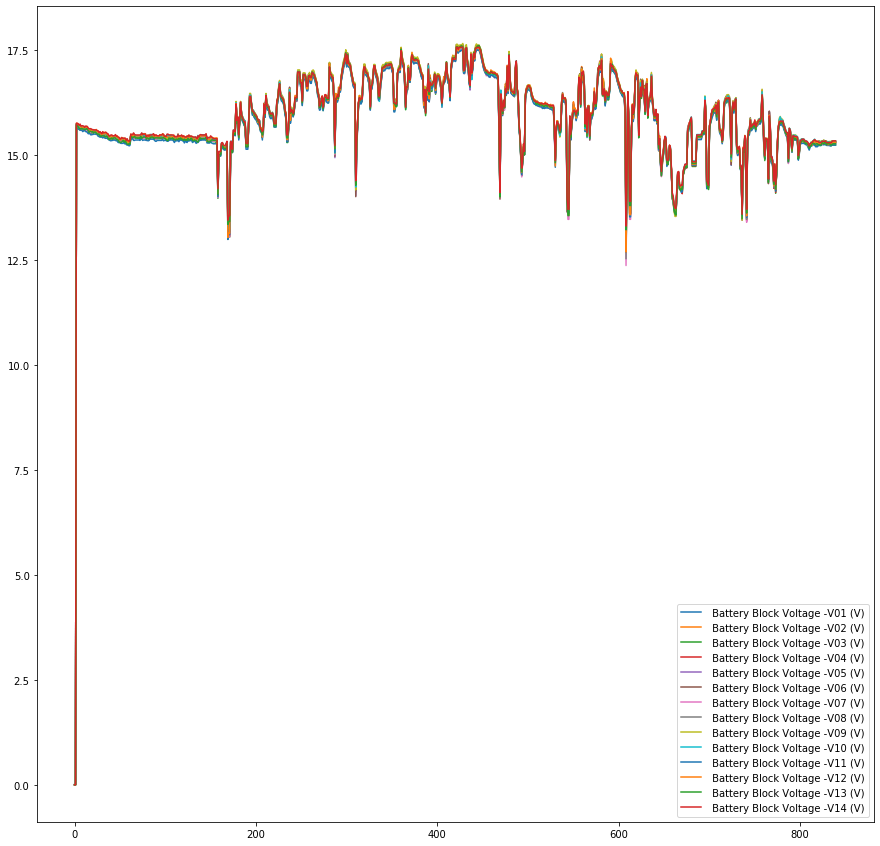

In [13]:
battery_block.plot(figsize=(15,15))

In [14]:
%%time
pathway = '../atx_geo_data/street_centerline/'
atx = gpd.read_file(pathway)#, SHAPE_RESTORE_SHX=yes)

CPU times: user 3.82 s, sys: 292 ms, total: 4.11 s
Wall time: 4.14 s


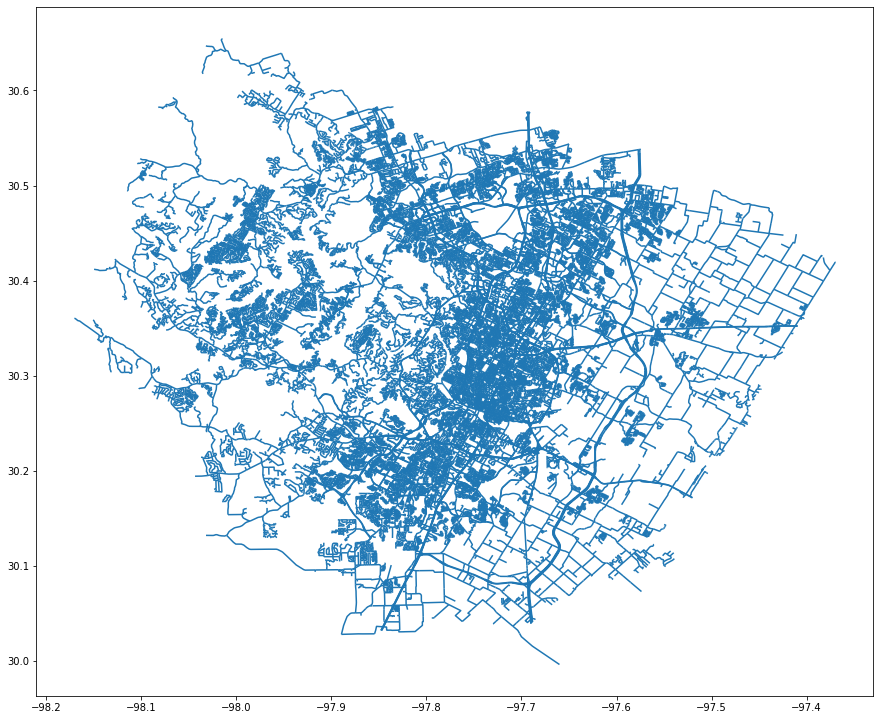

In [16]:
fig, ax = plt.subplots(figsize = (15,15))
atx.plot(ax = ax)

In [17]:
drive = [Point(xy) for xy in zip(data[' Longitude (deg)'], data[' Latitude (deg)'])]
crs = {'init':'epsg:4326'}

In [18]:
#plot still works w/ crs hashed out
geo_df = gpd.GeoDataFrame(data,
#                         crs = crs,
                         geometry = drive)

In [19]:
geo_df.head()

,Time,Latitude (deg),Longitude (deg),Vehicle speed (MPH),Battery Block Voltage -V01 (V),Battery Block Voltage -V02 (V),Battery Block Voltage -V03 (V),Battery Block Voltage -V04 (V),Battery Block Voltage -V05 (V),Battery Block Voltage -V06 (V),Battery Block Voltage -V07 (V),Battery Block Voltage -V08 (V),Battery Block Voltage -V09 (V),Battery Block Voltage -V10 (V),Battery Block Voltage -V11 (V),Battery Block Voltage -V12 (V),Battery Block Voltage -V13 (V),Battery Block Voltage -V14 (V),Calculate Load,geometry
0,02/02/2021 01:42:33.4212 PM,30.32,-97.69,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,POINT (-97.69000 30.32000)
1,02/02/2021 01:42:34.3672 PM,30.32,-97.69,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,POINT (-97.69000 30.32000)
2,02/02/2021 01:42:35.3170 PM,30.32,-97.69,0.0,15.75,15.76,15.67,15.70,15.71,15.73,15.70,15.71,15.74,15.73,15.66,15.71,15.72,15.76,32.93,POINT (-97.69000 30.32000)
3,02/02/2021 01:42:36.2673 PM,30.32,-97.69,0.0,15.71,15.75,15.66,15.69,15.70,15.71,15.65,15.70,15.72,15.69,15.64,15.75,15.71,15.76,32.93,POINT (-97.69000 30.32000)
4,02/02/2021 01:42:37.2168 PM,30.32,-97.69,0.0,15.73,15.75,15.66,15.71,15.70,15.70,15.68,15.70,15.72,15.70,15.62,15.72,15.67,15.74,32.93,POINT (-97.69000 30.32000)


In [20]:
geo_df.columns

Index(['Time', ' Latitude (deg)', ' Longitude (deg)', ' Vehicle speed (MPH)',
       ' Battery Block Voltage -V01 (V)', ' Battery Block Voltage -V02 (V)',
       ' Battery Block Voltage -V03 (V)', ' Battery Block Voltage -V04 (V)',
       ' Battery Block Voltage -V05 (V)', ' Battery Block Voltage -V06 (V)',
       ' Battery Block Voltage -V07 (V)', ' Battery Block Voltage -V08 (V)',
       ' Battery Block Voltage -V09 (V)', ' Battery Block Voltage -V10 (V)',
       ' Battery Block Voltage -V11 (V)', ' Battery Block Voltage -V12 (V)',
       ' Battery Block Voltage -V13 (V)', ' Battery Block Voltage -V14 (V)',
       ' Calculate Load', 'geometry'],
      dtype='object')

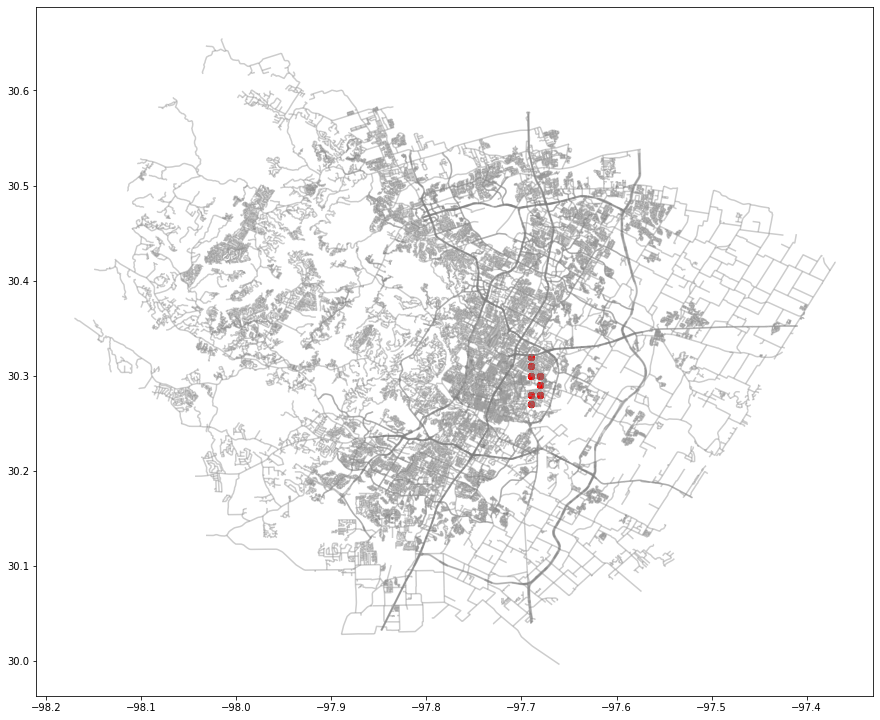

In [21]:
fig, ax = plt.subplots(figsize = (15,15))
atx.plot(ax = ax, alpha=0.4, color='grey')
geo_df['geometry'].plot(ax = ax, color='red')

In [22]:
#functions from astros cheating notebook.
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + \
                        (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [23]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

# hyothesis test

In [24]:
data.columns

Index(['Time', ' Latitude (deg)', ' Longitude (deg)', ' Vehicle speed (MPH)',
       ' Battery Block Voltage -V01 (V)', ' Battery Block Voltage -V02 (V)',
       ' Battery Block Voltage -V03 (V)', ' Battery Block Voltage -V04 (V)',
       ' Battery Block Voltage -V05 (V)', ' Battery Block Voltage -V06 (V)',
       ' Battery Block Voltage -V07 (V)', ' Battery Block Voltage -V08 (V)',
       ' Battery Block Voltage -V09 (V)', ' Battery Block Voltage -V10 (V)',
       ' Battery Block Voltage -V11 (V)', ' Battery Block Voltage -V12 (V)',
       ' Battery Block Voltage -V13 (V)', ' Battery Block Voltage -V14 (V)',
       ' Calculate Load', 'geometry'],
      dtype='object')

In [25]:
battery1 = data[' Battery Block Voltage -V01 (V)']
battery2 = data[' Battery Block Voltage -V02 (V)']
battery3 = data[' Battery Block Voltage -V03 (V)']
battery4 = data[' Battery Block Voltage -V04 (V)']
battery5 = data[' Battery Block Voltage -V05 (V)']
battery6 = data[' Battery Block Voltage -V06 (V)']
battery7 = data[' Battery Block Voltage -V07 (V)']
battery8 = data[' Battery Block Voltage -V08 (V)']
battery9 = data[' Battery Block Voltage -V09 (V)']
battery10 = data[' Battery Block Voltage -V10 (V)']
battery11 = data[' Battery Block Voltage -V11 (V)']
battery12 = data[' Battery Block Voltage -V12 (V)']
battery13 = data[' Battery Block Voltage -V13 (V)']
battery14 = data[' Battery Block Voltage -V14 (V)']

In [26]:
#Null: there is no difference between battery7 and battery14
#alternative: there is a difference between battery7 and batter14
#significance level. 2.5 because i want it to a two-tailed test

In [27]:
print(np.mean(battery7))
print(np.var(battery7))
print(np.mean(battery14))
print(np.var(battery14))

15.905333333333363
1.2713806031746058
15.964130952380957
1.2432375780895666


In [28]:
#t-test

In [29]:
batt7_batt4 = stats.ttest_ind(battery7, battery4)

In [30]:
batt7_batt4

Ttest_indResult(statistic=-0.46214028717023364, pvalue=0.644040632905815)

Astro's t-statistic is -0.46214028717023364, and p-value is 0.644040632905815


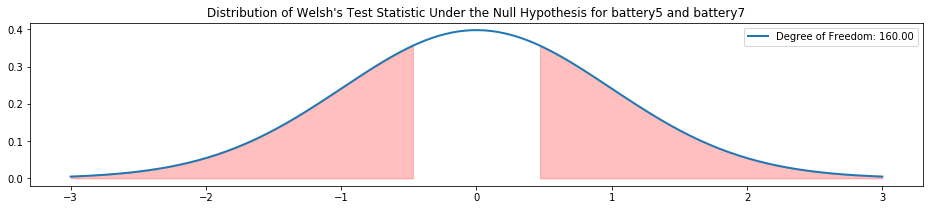

In [31]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
curve = stats.t(160)
ax.plot(x, curve.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(160))
ax.fill_between(x, curve.pdf(x), where=(x >= -batt7_batt4[0]), color="red", alpha=0.25)
ax.fill_between(x, curve.pdf(x), where=(x <= batt7_batt4[0]), color="red", alpha=0.25)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis for battery5 and battery7")

print(f"Astro's t-statistic is {batt7_batt4[0]}, and p-value is {batt7_batt4[1]}")
